In [49]:
%load_ext autoreload
%autoreload 2

import collections
import cPickle as pickle
import lasagne
import mahotas as mh
import numpy as np
import os
import time

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

import mlproof as mlp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
image, prob, mask, gold, rhoana = mlp.Util.read_section('/home/d/data/cylinderNEW/', 100)

Loading z00000100.png


In [159]:
prob = 1.-prob

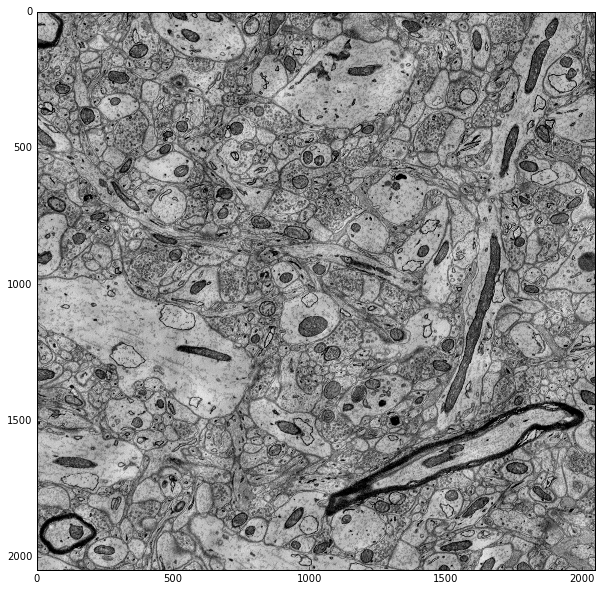

In [11]:
mlp.Util.view(image, color=False, large=True)

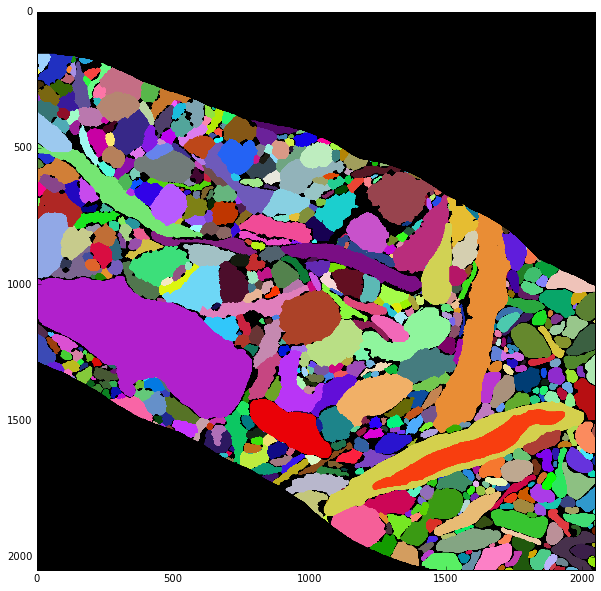

In [9]:
mlp.Util.view(gold, color=True, large=True)

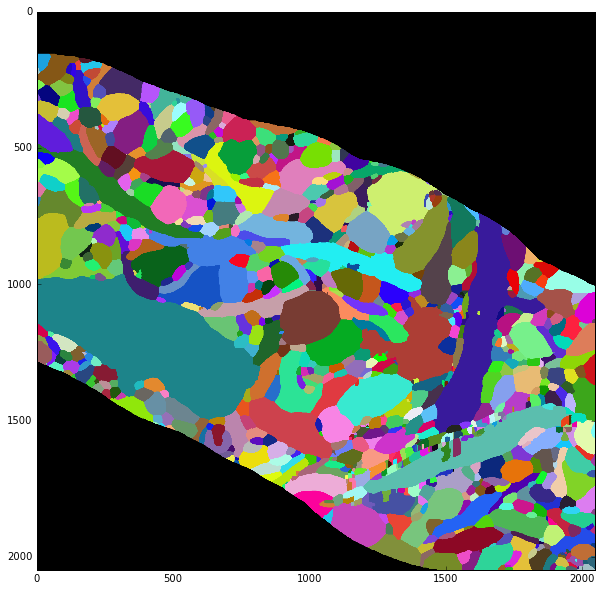

In [10]:
mlp.Util.view(rhoana, color=True, large=True)

In [12]:
rhoana[1000,600]

546

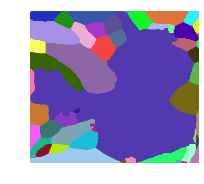

In [243]:
label_value = rhoana[1250,1400]
binary = mlp.Util.threshold(rhoana, label_value)
bb = mh.bbox(single_label)
mlp.Util.view(mlp.Util.normalize_labels(mlp.Util.crop_by_bbox(rhoana, bb))[0], color=True, large=False, file='/tmp/seg.png')

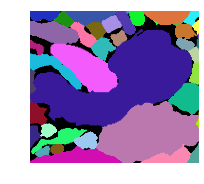

In [244]:
mlp.Util.view(mlp.Util.normalize_labels(mlp.Util.crop_by_bbox(gold, single_label_bb))[0], color=True, large=False, file='/tmp/gold.png')

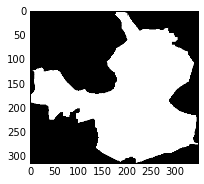

In [29]:
mlp.Util.view(binary, color=False, crop=True)

In [34]:
c_image = mlp.Util.crop_by_bbox(image, bb, 50)
c_prob = mlp.Util.crop_by_bbox(prob, bb, 50)
c_binary = mlp.Util.crop_by_bbox(binary, bb, 50)

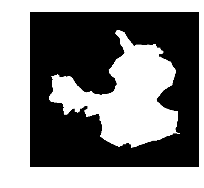

In [245]:
mlp.Util.view(c_binary, color=False, file='/tmp/binary.png')

In [54]:
path = '/home/d/nets/MergeNetDropout_cylinder1_larger_border_overlap_dropout_usevars_LargerDropout/net.p'
input_names = []
input_values = []
with open(path, 'rb') as f:
    cnn = pickle.load(f)
    
    test_inputs = collections.OrderedDict()

    for l in cnn.layers:
        layer_name, layer_type = l
        if layer_type == lasagne.layers.input.InputLayer:
          input_name = layer_name.split('_')[0]
          if input_name == 'binary':
            input_name = 'merged_array'
          if input_name == 'border':
            input_name = 'border_overlap'
            if path.find('larger_border_overlap') != -1:
              input_name = 'larger_border_overlap'

          input_names.append(layer_name)
          input_values.append(input_name)
#           test_inputs[layer_name] = X_test[input_name]
    cnn.input_names = input_names
    cnn.input_values = input_values
    cnn.uuid = os.path.basename(os.path.dirname(path))

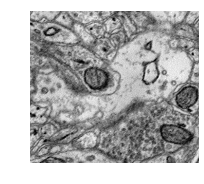

In [246]:
mlp.Util.view(mlp.Util.crop_by_bbox(image, bb), color=False, large=False, file='/tmp/image.png')

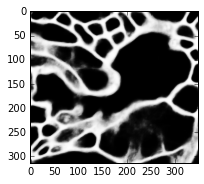

In [160]:
mlp.Util.view(mlp.Util.crop_by_bbox(prob, bb), color=False, large=False)

In [250]:
# dilate binary mask
ddd = np.array(c_binary, dtype=np.bool)
for d in range(20):
    ddd = mh.dilate(ddd)
    

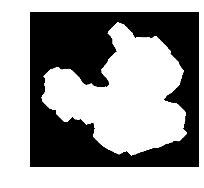

In [252]:
mlp.Util.view(ddd, color=False, file='/tmp/dilate.png')

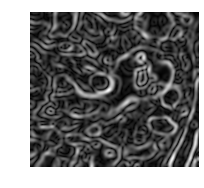

In [273]:
# speed image
mlp.Util.view(mlp.Legacy.gradient(c_image), color=False, file='/tmp/gradient.png')

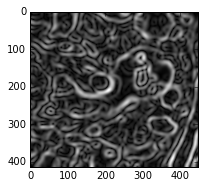

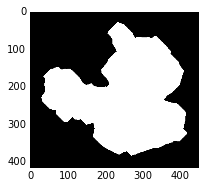

In [217]:
results = mlp.Legacy.fix_single_merge(cnn, c_image, c_prob, c_binary, N=100, invert=False)

In [231]:
f_results = []

d_results = collections.OrderedDict()
d2_results = collections.OrderedDict()
for r in results:
    if r[0] <= 0.05:
        f_results.append(r)
        
f_results = sorted(f_results, key=lambda tup: tup[0])        
for f in f_results:
    d_results[str(f[0])] = f[1]
    
s_results = sorted(results, key=lambda tup: tup[0])        
for f in s_results:
    d2_results[str(f[0])] = f[1]    

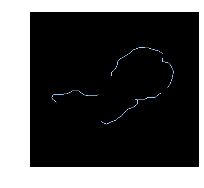

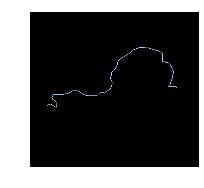

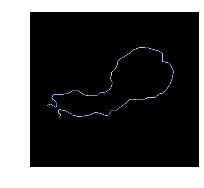

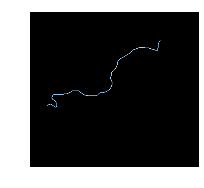

In [263]:
for d in d2_results.keys():
    mlp.Util.view(d2_results[d])

In [233]:
d_results.keys()

['0.0369470211625', '0.0414124456574']

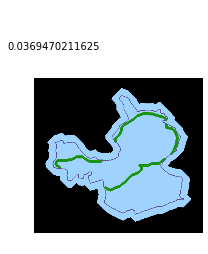

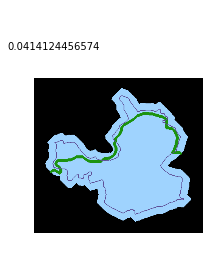

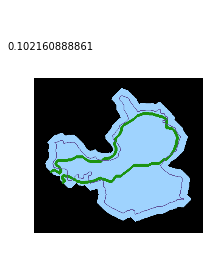

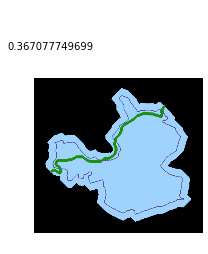

In [271]:
for i,d in enumerate(d2_results.keys()):
    bbb = np.array(d2_results[d], dtype=np.uint8)
    bbb = mh.dilate(bbb)
    bbb = mh.dilate(bbb)
    bbb = mh.dilate(bbb)    
#     bbb[bbb==bbb.max()] = 1000
    summe = np.array(ddd, dtype=np.uint8)
    binary_border = mh.labeled.border(c_binary, 0, 1)
    
    summe[bbb==bbb.max()] = 3
    summe[binary_border==1] = 10
    mlp.Util.view(summe, text=str(d), file='/tmp/'+str(i)+'.png')

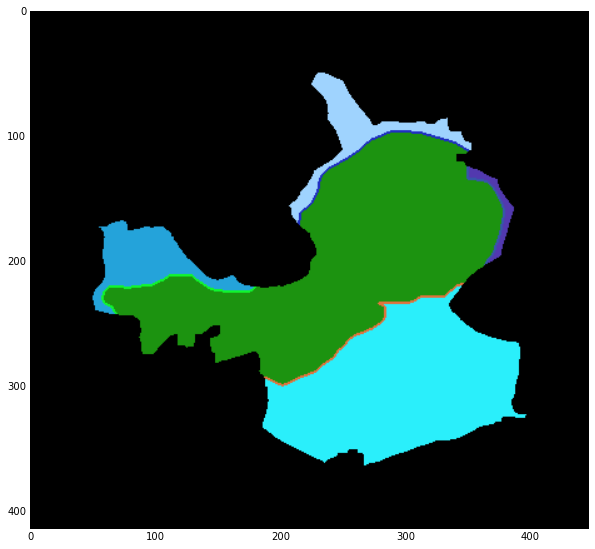

In [225]:
corrected = mlp.Legacy.correct_merge(mlp.Util.crop_by_bbox(rhoana, bb, 50), label_value, d_results[d_results.keys()[0]])

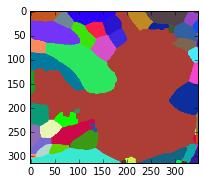

In [74]:
mlp.Util.view(mlp.Util.crop_by_bbox(rhoana, bb), color=True, large=False)

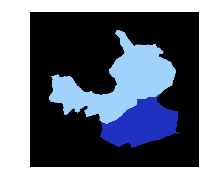

In [248]:
mlp.Util.view(corrected, color=True, large=False, file='/tmp/corrected.png')

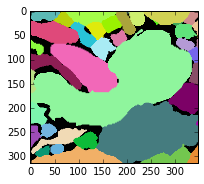

In [75]:
mlp.Util.view(mlp.Util.crop_by_bbox(gold, bb), color=True, large=False)

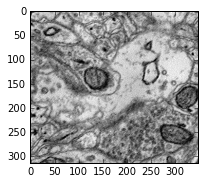

In [94]:
mlp.Util.view(mlp.Util.crop_by_bbox(image, bb), color=False, large=False)

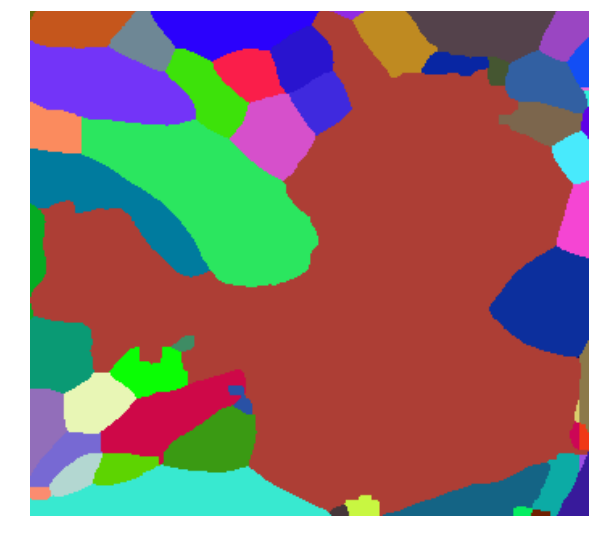

In [275]:
mlp.Util.view(mlp.Util.crop_by_bbox(rhoana, bb), color=True, large=True)